In [1]:
import os
import numpy as np
from collections import defaultdict
import librosa

base_dir = '/home/jovyan/work'

# sequences of segment-level embeddings
voxcon_test_seqs = np.load(f'{base_dir}/sequences/fixed-voxcon-test-sequences.npy', allow_pickle=True).tolist()
# voxsrc21_seqs = np.load(f'{base_dir}/sequences/voxsrc21-sequences.npy', allow_pickle=True).tolist()

# segments intervals, for creating resulting RTTM and calculating DER and JER
voxcon_test_intervals = np.load(f'{base_dir}/sequences/fixed-voxcon-test-intervals.npy', allow_pickle=True).tolist()
# voxsrc21_intervals = np.load(f'{base_dir}/sequences/voxsrc21-intervals.npy', allow_pickle=True).tolist()

# ids sorted by processing order (regarding to seqs and interval clusters)
voxcon_test_audio_ids = ["aepyx","aiqwk","bjruf","bmsyn","bxcfq","byapz","clfcg","cqfmj","crylr","cvofp","dgvwu","dohag","dxbbt","dzsef","eauve","eazeq","eguui","epygx","eqsta","euqef","fijfi","fpfvy","fqrnu","fxnwf","fyqoe","gcfwp","gtjow","gtnjb","gukoa","guvqf","gylzn","gyomp","hcyak","heolf","hhepf","ibrnm","ifwki","iiprr","ikhje","jdrwl","jjkrt","jjvkx","jrfaz","jsbdo","jttar","jxpom","jzkzt","kajfh","kmunk","kpjud","ktvto","kvkje","lbfnx","ledhe","lilfy","ljpes","lkikz","lpola","lscfc","ltgmz","lubpm","luobn","mjmgr","msbyq","mupzb","myjoe","nlvdr","nprxc","ocfop","ofbxh","olzkb","ooxlj","oqwpd","otmpf","ouvtt","poucc","ppexo","pwnsw","qadia","qeejz","qlrry","qwepo","rarij","rmvsh","rxulz","sebyw","sexgc","sfdvy","svxzm","tkybe","tpslg","uedkc","uqxlg","usqam","vncid","vylyk","vzuru","wdvva","wemos","wprog","wwzsk","xggbk","xkgos","xlyov","xmyyy","xqxkt","xtdcl","xtzoq","xvxwv","ybhwz","ylzez","ytmef","yukhy","yzvon","zedtj","zfzlc","zowse","zqidv","zztbo","ralnu","uicid","laoyl","jxydp","pzxit","upshw","gfneh","kzmyi","nkqzr","kgjaa","dkabn","eucfa","erslt","mclsr","fzwtp","dzxut","pkwrt","gmmwm","leneg","sxqvt","pgtkk","fuzfh","vtzqw","rsypp","qxana","optsn","dxokr","ptses","isxwc","gzhwb","mhwyr","duvox","ezxso","jgiyq","rpkso","kmjvh","wcxfk","gcvrb","eddje","pccww","vuewy","tvtoe","oubab","jwggf","aggyz","bidnq","neiye","mkhie","iowob","jbowg","gwloo","uevxo","nitgx","eoyaz","qoarn","mxdpo","auzru","diysk","cwbvu","jeymh","iacod","cawnd","vgaez","bgvvt","tiido","aorju","qajyo","ryken","iabca","tkhgs","tbjqx","mqtep","fowhl","fvhrk","nqcpi","mbzht","uhfrw","utial","cpebh","tnjoh","jsymf","vgevv","mxduo","gkiki","bvyvm","hqhrb","isrps","nqyqm","dlast","pxqme","bpzsc","vdlvr","lhuly","crorm","bvqnu","tpnyf","thnuq","swbnm","cadba","sbrmv","wibky","wlfsf","wwvcs","xffsa","xkmqx","xlsme","ygrip","ylgug","ytula","zehzu","zsgto","zzsba","zzyyo"]
voxsrc21_audio_ids = ["tpine", "huqpy", "uzsvq", "pirso", "npnyp", "jsatj", "kuunx", "klbrr", "ecugo", "dwtow", "lhbqr", "zfipy", "wsobx", "jxkah", "hjvtj", "dpbgj", "phcxl", "uddju", "hufrz", "fibgq", "ahrcr", "cnbhz", "ahpuj", "biypq", "taukp", "iwvbh", "zobzz", "chvgo", "zsngo", "ixbvn", "ruwbp", "dufvn", "hajxp", "ohjjf", "veada", "zfzwt", "aqlrr", "qvroz", "cqfbd", "hzttx", "jrxnz", "gcccl", "qgzvk", "ieaoq", "jwezt", "ovxrk", "oitjh", "xivtm", "rnmrp", "euhwq", "iflmj", "hffvn", "eoxkf", "ycycy", "fwjhb", "yhntc", "ersxa", "afhlm", "uhpjz", "saenk", "oszsp", "zkmgn", "cgjuc", "vofje", "ajjmr", "mkbjy", "cxrjf", "jbirg", "hmnyo", "mknge", "xahab", "svnoe", "iucho", "uwgqx", "sfjjj", "rymcy", "rycwr", "fdtlj", "ewkei", "pojyu", "vrgwd", "bfwgq", "goots", "mrbme", "nzoid", "cehwp", "uosun", "pzrcf", "kpecv", "pwutv", "ipszk", "ktmre", "bylqb", "mrgru", "osrss", "ftajg", "xairp", "whibh", "xmkio", "rvyug", "tealt", "ezptn", "kpihx", "ubthy", "njuto", "komgz", "ahcuo", "lcowh", "vuqbp", "wnoyw", "zliuj", "dvofo", "yhivq", "xvaqn", "ixcig", "zauxp", "nzonc", "rvrlo", "xesmw", "mylgb", "askiw", "nsibk", "quinj", "swpjb", "fsfdw", "kcoeu", "eeivl", "tuczd", "jjbsx", "ytvbn", "dwsdu","fseqv", "zjrun", "pqifp", "aqind", "enrur", "vtdos", "ymvrw", "welcq", "wazie", "ssbra", "kxzac", "tcwva", "epbjz", "hkfjg", "bwpth", "cnwba", "vghwm", "usxym", "yyldd", "govov", "ueoss", "ivmhq", "gsigu", "sotzc", "ebixn", "zhcic", "ckivy", "tldnh", "hiukp", "lvrse", "sdpur", "ubitk", "reljk", "hfzhn", "axabh", "bmldz", "ujdjd", "kgzrb", "msnqr", "syucd", "ognux", "ahorw", "ifafa", "bpbon", "yywxf", "qezbm", "sljce", "nttgg", "uupjc", "gukfd", "hexbr", "jnoor", "rfyhi", "pbocz", "eqalx", "tpfau", "aoehz", "hmkzx", "zdymj", "qxezs", "irswh", "zktli", "dkpkx", "cqhil", "kxjyn", "rjpos", "kqlln", "vqzkm", "jucfh", "wjwes", "mebni", "ubogn", "obsbu", "dsuiy", "fmtir", "alpmg", "sndtu", "tkxsz", "qnuxe", "ctjzs", "uelsx", "xwaec", "bzlts", "fftup", "fqpdh", "ffcio", "wofgd", "oiyjs", "avvvz", "tbedi", "zyjfv", "bgkus", "linoq", "ptctn", "fhjbj", "wmhps", "lceba", "msswz", "rxldb", "lqvix", "vwgph", "zsgyz", "anojt", "lwxbp", "slldp", "jpjcy", "xpewn", "bamsl", "qmsgw", "wayap", "eizev", "nbema", "sqtvn", "oewsu", "rjdar", "rjmds", "vwftp", "ckeyp", "fcghr", "jfkiy", "ogkch", "iadsf", "jrnnn", "vjkrd", "brxew", "uyykg", "xikii", "zskbo", "xmezt", "kygkd", "rpjuz", "bmria", "eumxr"]

In [2]:
from spectralcluster import SpectralClusterer
from spectralcluster import RefinementOptions, refinement
from spectralcluster import ThresholdType, AutoTune
from spectralcluster import ICASSP2018_REFINEMENT_SEQUENCE
from spectralcluster import configs

from pyannote.core import Annotation, Segment
from pyannote.database.util import load_rttm
from pyannote.metrics.diarization import DiarizationErrorRate, JaccardErrorRate

# Configurations that are closest to the ICASSP2018 paper
# "Speaker Diarization with LSTM".
RefinementName = refinement.RefinementName

ICASSP2018_REFINEMENT_SEQUENCE = [
    RefinementName.CropDiagonal,
    RefinementName.GaussianBlur,
    RefinementName.RowWiseThreshold,
    RefinementName.Symmetrize,
    RefinementName.Diffuse,
    RefinementName.RowWiseNormalize,
]

icassp2018_refinement_options = RefinementOptions(
    gaussian_blur_sigma=1,
    p_percentile=0.95,
    thresholding_soft_multiplier=0.01,
    thresholding_type=ThresholdType.RowMax,
    refinement_sequence=ICASSP2018_REFINEMENT_SEQUENCE)

autotune = AutoTune(
    p_percentile_min=0.60,
    p_percentile_max=0.95,
    init_search_step=0.01,
    search_level=3)

icassp2018_clusterer = SpectralClusterer(
    min_clusters=2,
    max_clusters=18,
    autotune=None,
    laplacian_type=None,
    refinement_options=icassp2018_refinement_options,
    custom_dist="cosine")

## Define sequences and its respective intervals

In [3]:
sequences = voxcon_test_seqs
intervals = voxcon_test_intervals
sample_ids = voxcon_test_audio_ids

# load rttm files for metrics calculating
rttm_path = f'{base_dir}/datasets/voxconverse/test/rttm'
rttm_files = defaultdict(list)
for sample_id in sample_ids:
    rttm_files[sample_id] = os.path.join(rttm_path, sample_id + '.rttm')

## Cluster a single sequence

In [4]:
idx = 259
sample_id = sample_ids[idx]

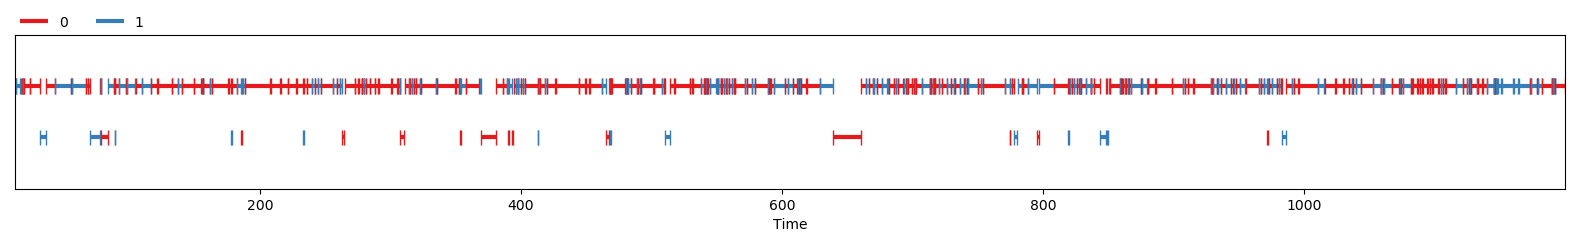

In [7]:
# labels = icassp2018_clusterer.predict(sequences[idx])
labels = configs.icassp2018_clusterer.predict(sequences[idx])


annotation = Annotation()
annotation.uri = sample_id
for jdx, speaker_id in enumerate(labels):
    segment_interval = intervals[idx][jdx]
    annotation[Segment(segment_interval[0], segment_interval[1])] = speaker_id

hypothesis = annotation.support()
hypothesis

In [ ]:
reference = load_rttm(rttm_files[sample_id])[sample_id]
reference

In [13]:
der = derMetric(reference, hypothesis, detailed = True)
jer = jerMetric(reference, hypothesis)

confusion = der['confusion']/der['total']
false_alarm = der['false alarm']/der['total']
missed_detection = der['missed detection']/der['total']

print(f'{sample_id} DER = {100 * der["diarization error rate"]:.1f}% JER = {100 * jer:.1f}%')
print(f'{sample_id} DER_conf = {100 * confusion:.1f}% DER_fa = {100 * false_alarm:.1f}% DER_md = {100 * missed_detection:.1f}%')

bxcfq DER = 4.5% JER = 6.6%
bxcfq DER_conf = 0.3% DER_fa = 0.0% DER_md = 4.2%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


## Cluster all sequences

In [4]:
derMetric = DiarizationErrorRate(collar=0.25)
jerMetric = JaccardErrorRate(collar=0.25)

predictions = []

for idx, sample_id in enumerate(sample_ids):
    labels = configs.icassp2018_clusterer.predict(sequences[idx])
#     labels = icassp2018_clusterer.predict(sequences[idx])
    
    annotation = Annotation()
    annotation.uri = sample_id
    for jdx, speaker_id in enumerate(labels):
        segment_interval = intervals[idx][jdx]
        annotation[Segment(segment_interval[0], segment_interval[1])] = speaker_id
    predictions.append(annotation)
    
    hypothesis = annotation.support()
    reference = load_rttm(rttm_files[sample_id])[sample_id]
    
    der = derMetric(reference, hypothesis, detailed = True)
    jer = jerMetric(reference, hypothesis)
    
    confusion = der['confusion']/der['total']
    false_alarm = der['false alarm']/der['total']
    missed_detection = der['missed detection']/der['total']
    

    
    print(f'{sample_id} Speakers: (truth) {len(reference.labels())} vs {len(hypothesis.labels())} (prediction)')
    print(f'DER = {100 * der["diarization error rate"]:.1f}% JER = {100 * jer:.1f}%')
    print(f'DER_conf = {100 * confusion:.1f}% DER_fa = {100 * false_alarm:.1f}% DER_md = {100 * missed_detection:.1f}%')

#     rttmFile = f'{base_dir}/rttm/{}.rttm'.format(audio_id)
#     with open(rttmFile, 'w') as writeRttmFile:
#         joined_annotation.write_rttm(writeRttmFile)    

/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


aepyx Speakers: (truth) 4 vs 2 (prediction)
DER = 55.8% JER = 79.9%
DER_conf = 48.4% DER_fa = 4.1% DER_md = 3.3%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


aiqwk Speakers: (truth) 8 vs 2 (prediction)
DER = 38.3% JER = 85.1%
DER_conf = 31.9% DER_fa = 3.7% DER_md = 2.6%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


bjruf Speakers: (truth) 2 vs 2 (prediction)
DER = 32.2% JER = 43.4%
DER_conf = 20.2% DER_fa = 0.9% DER_md = 11.1%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


bmsyn Speakers: (truth) 5 vs 2 (prediction)
DER = 59.3% JER = 82.0%
DER_conf = 43.9% DER_fa = 7.6% DER_md = 7.8%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


bxcfq Speakers: (truth) 2 vs 2 (prediction)
DER = 4.5% JER = 6.6%
DER_conf = 0.3% DER_fa = 0.0% DER_md = 4.2%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


byapz Speakers: (truth) 15 vs 2 (prediction)
DER = 59.6% JER = 96.1%
DER_conf = 55.8% DER_fa = 1.7% DER_md = 2.0%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


clfcg Speakers: (truth) 9 vs 2 (prediction)
DER = 61.8% JER = 88.7%
DER_conf = 51.7% DER_fa = 6.8% DER_md = 3.3%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


cqfmj Speakers: (truth) 4 vs 2 (prediction)
DER = 8.6% JER = 51.9%
DER_conf = 1.5% DER_fa = 2.3% DER_md = 4.8%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


crylr Speakers: (truth) 4 vs 2 (prediction)
DER = 44.3% JER = 77.1%
DER_conf = 38.3% DER_fa = 3.4% DER_md = 2.7%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


cvofp Speakers: (truth) 6 vs 2 (prediction)
DER = 53.7% JER = 83.8%
DER_conf = 43.9% DER_fa = 2.3% DER_md = 7.5%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


dgvwu Speakers: (truth) 11 vs 3 (prediction)
DER = 35.1% JER = 83.2%
DER_conf = 28.8% DER_fa = 1.1% DER_md = 5.2%
dohag Speakers: (truth) 1 vs 2 (prediction)
DER = 49.0% JER = 48.9%
DER_conf = 43.7% DER_fa = 0.2% DER_md = 5.0%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


dxbbt Speakers: (truth) 3 vs 2 (prediction)
DER = 27.0% JER = 49.6%
DER_conf = 24.0% DER_fa = 0.8% DER_md = 2.3%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


dzsef Speakers: (truth) 3 vs 2 (prediction)
DER = 10.1% JER = 48.0%
DER_conf = 9.3% DER_fa = 0.1% DER_md = 0.7%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


eauve Speakers: (truth) 7 vs 2 (prediction)
DER = 43.4% JER = 87.2%
DER_conf = 34.0% DER_fa = 0.4% DER_md = 9.0%
eazeq Speakers: (truth) 2 vs 2 (prediction)
DER = 27.2% JER = 39.4%
DER_conf = 17.3% DER_fa = 2.3% DER_md = 7.6%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


eguui Speakers: (truth) 3 vs 3 (prediction)
DER = 38.2% JER = 50.3%
DER_conf = 16.7% DER_fa = 0.3% DER_md = 21.2%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


epygx Speakers: (truth) 8 vs 2 (prediction)
DER = 31.6% JER = 82.9%
DER_conf = 27.2% DER_fa = 2.8% DER_md = 1.6%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


eqsta Speakers: (truth) 15 vs 2 (prediction)
DER = 41.2% JER = 93.2%
DER_conf = 29.1% DER_fa = 1.9% DER_md = 10.2%
euqef Speakers: (truth) 1 vs 2 (prediction)
DER = 53.0% JER = 52.1%
DER_conf = 47.3% DER_fa = 1.7% DER_md = 4.0%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


fijfi Speakers: (truth) 6 vs 2 (prediction)
DER = 31.9% JER = 80.3%
DER_conf = 25.9% DER_fa = 2.9% DER_md = 3.1%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


fpfvy Speakers: (truth) 11 vs 2 (prediction)
DER = 40.9% JER = 90.4%
DER_conf = 37.0% DER_fa = 1.8% DER_md = 2.1%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


fqrnu Speakers: (truth) 4 vs 2 (prediction)
DER = 26.2% JER = 63.6%
DER_conf = 16.3% DER_fa = 1.5% DER_md = 8.4%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


fxnwf Speakers: (truth) 3 vs 2 (prediction)
DER = 30.0% JER = 58.7%
DER_conf = 18.4% DER_fa = 4.8% DER_md = 6.8%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


fyqoe Speakers: (truth) 3 vs 2 (prediction)
DER = 53.5% JER = 74.2%
DER_conf = 37.1% DER_fa = 0.2% DER_md = 16.2%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


gcfwp Speakers: (truth) 8 vs 2 (prediction)
DER = 63.3% JER = 92.8%
DER_conf = 54.7% DER_fa = 7.7% DER_md = 0.9%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


gtjow Speakers: (truth) 4 vs 4 (prediction)
DER = 16.1% JER = 22.4%
DER_conf = 8.6% DER_fa = 0.7% DER_md = 6.8%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


gtnjb Speakers: (truth) 14 vs 3 (prediction)
DER = 41.4% JER = 84.9%
DER_conf = 39.1% DER_fa = 0.3% DER_md = 2.0%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


gukoa Speakers: (truth) 11 vs 2 (prediction)
DER = 41.4% JER = 87.2%
DER_conf = 35.4% DER_fa = 1.6% DER_md = 4.4%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


guvqf Speakers: (truth) 11 vs 2 (prediction)
DER = 61.6% JER = 95.2%
DER_conf = 49.7% DER_fa = 4.2% DER_md = 7.7%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


gylzn Speakers: (truth) 2 vs 2 (prediction)
DER = 4.3% JER = 4.7%
DER_conf = 0.2% DER_fa = 1.4% DER_md = 2.8%
gyomp Speakers: (truth) 5 vs 2 (prediction)
DER = 44.1% JER = 75.9%
DER_conf = 40.2% DER_fa = 3.0% DER_md = 0.8%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


hcyak Speakers: (truth) 8 vs 2 (prediction)
DER = 35.1% JER = 85.2%
DER_conf = 31.5% DER_fa = 0.8% DER_md = 2.7%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


heolf Speakers: (truth) 12 vs 2 (prediction)
DER = 63.1% JER = 95.2%
DER_conf = 59.3% DER_fa = 1.5% DER_md = 2.4%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


hhepf Speakers: (truth) 7 vs 2 (prediction)
DER = 49.5% JER = 85.8%
DER_conf = 44.6% DER_fa = 1.7% DER_md = 3.2%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


ibrnm Speakers: (truth) 12 vs 2 (prediction)
DER = 36.5% JER = 89.3%
DER_conf = 33.5% DER_fa = 1.1% DER_md = 1.9%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


ifwki Speakers: (truth) 2 vs 2 (prediction)
DER = 10.1% JER = 12.5%
DER_conf = 1.6% DER_fa = 1.3% DER_md = 7.3%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


iiprr Speakers: (truth) 7 vs 2 (prediction)
DER = 36.1% JER = 83.0%
DER_conf = 31.4% DER_fa = 2.5% DER_md = 2.2%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


ikhje Speakers: (truth) 9 vs 2 (prediction)
DER = 18.6% JER = 82.5%
DER_conf = 13.5% DER_fa = 0.7% DER_md = 4.4%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


jdrwl Speakers: (truth) 7 vs 2 (prediction)
DER = 55.5% JER = 83.0%
DER_conf = 50.9% DER_fa = 0.5% DER_md = 4.1%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


jjkrt Speakers: (truth) 6 vs 2 (prediction)
DER = 51.1% JER = 88.3%
DER_conf = 44.0% DER_fa = 1.2% DER_md = 5.9%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


jjvkx Speakers: (truth) 6 vs 2 (prediction)
DER = 58.9% JER = 86.3%
DER_conf = 57.7% DER_fa = 0.3% DER_md = 0.9%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


jrfaz Speakers: (truth) 9 vs 2 (prediction)
DER = 70.6% JER = 92.9%
DER_conf = 58.1% DER_fa = 1.1% DER_md = 11.4%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


jsbdo Speakers: (truth) 7 vs 2 (prediction)
DER = 22.6% JER = 79.5%
DER_conf = 15.1% DER_fa = 1.2% DER_md = 6.4%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


jttar Speakers: (truth) 7 vs 2 (prediction)
DER = 40.6% JER = 91.3%
DER_conf = 39.4% DER_fa = 0.9% DER_md = 0.3%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


jxpom Speakers: (truth) 7 vs 2 (prediction)
DER = 49.9% JER = 89.4%
DER_conf = 38.9% DER_fa = 1.9% DER_md = 9.1%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


jzkzt Speakers: (truth) 11 vs 2 (prediction)
DER = 47.6% JER = 92.7%
DER_conf = 38.5% DER_fa = 2.3% DER_md = 6.9%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


kajfh Speakers: (truth) 15 vs 2 (prediction)
DER = 57.4% JER = 94.0%
DER_conf = 49.5% DER_fa = 3.1% DER_md = 4.7%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


kmunk Speakers: (truth) 2 vs 2 (prediction)
DER = 7.0% JER = 8.0%
DER_conf = 1.3% DER_fa = 2.3% DER_md = 3.4%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


kpjud Speakers: (truth) 9 vs 2 (prediction)
DER = 53.0% JER = 87.8%
DER_conf = 45.3% DER_fa = 0.5% DER_md = 7.1%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


ktvto Speakers: (truth) 9 vs 2 (prediction)
DER = 39.6% JER = 89.1%
DER_conf = 33.3% DER_fa = 1.4% DER_md = 4.9%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


kvkje Speakers: (truth) 8 vs 2 (prediction)
DER = 68.1% JER = 90.4%
DER_conf = 63.2% DER_fa = 4.2% DER_md = 0.7%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


lbfnx Speakers: (truth) 15 vs 2 (prediction)
DER = 60.6% JER = 94.7%
DER_conf = 55.2% DER_fa = 2.0% DER_md = 3.4%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


ledhe Speakers: (truth) 3 vs 2 (prediction)
DER = 12.5% JER = 43.8%
DER_conf = 5.4% DER_fa = 1.0% DER_md = 6.1%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


lilfy Speakers: (truth) 5 vs 2 (prediction)
DER = 49.8% JER = 83.7%
DER_conf = 47.2% DER_fa = 1.9% DER_md = 0.8%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


ljpes Speakers: (truth) 4 vs 2 (prediction)
DER = 26.3% JER = 61.4%
DER_conf = 21.4% DER_fa = 2.4% DER_md = 2.5%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


lkikz Speakers: (truth) 2 vs 2 (prediction)
DER = 33.7% JER = 48.8%
DER_conf = 21.6% DER_fa = 1.3% DER_md = 10.8%


/opt/conda/lib/python3.7/site-packages/pyannote/metrics/utils.py:184: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


lpola Speakers: (truth) 3 vs 2 (prediction)
DER = 21.4% JER = 50.9%
DER_conf = 14.9% DER_fa = 1.4% DER_md = 5.0%


KeyboardInterrupt: 

In [ ]:
reference

In [ ]:
reference = load_rttm(rttm_files[sample_id])[sample_id]